In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
nyc = gpd.read_file('../data/Borough_Boundaries.geojson')
print(nyc.crs)
nyc.head()

epsg:4326


boro_code      boro_name     shape_area     shape_leng  \
0         4         Queens  3040205594.95  900269.280485   
1         3       Brooklyn  1934167333.21  728477.954082   
2         5  Staten Island  1623631283.36  325924.002076   
3         1      Manhattan  636620785.519  359993.126318   
4         2          Bronx  1187193588.79  463868.599917   

                                            geometry  
0  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...  
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
2  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [3]:
type(nyc)

geopandas.geodataframe.GeoDataFrame

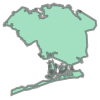

In [4]:
nyc.loc[0, 'geometry']

In [5]:
print(nyc.loc[0, 'geometry'])

MULTIPOLYGON (((-73.82644661516991 40.59052744193831, -73.82642403888464 40.59049483052486, -73.82640914894399 40.59045974688132, -73.82640238825243 40.59042323460854, -73.82640395790071 40.59038637980206, -73.82641381118461 40.59035027874408, -73.82643165499539 40.59031600529457, -73.82645695854175 40.5902845789477, -73.8264889691382 40.59025693450695, -73.8267745715186 40.5900320080855, -73.82681097362916 40.58999305153171, -73.8268542600488 40.58995842799489, -73.82690355436803 40.58992883848113, -73.82695785854278 40.58990488207443, -73.82701607309994 40.58988704380752, -73.82713881899797 40.58985224993937, -73.82725825688735 40.58981130855536, -73.82737385766713 40.58976440102488, -73.82737543424058 40.58978519204887, -73.82737265672866 40.58980590986252, -73.82736559571907 40.58982602790974, -73.82735443066846 40.58984503487772, -73.82733944534036 40.58986244769183, -73.82732102059438 40.58987782379372, -73.8273183991794 40.58988942277339, -73.82731837807653 40.5899011926368, -73

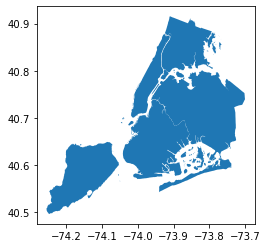

In [6]:
nyc.plot();

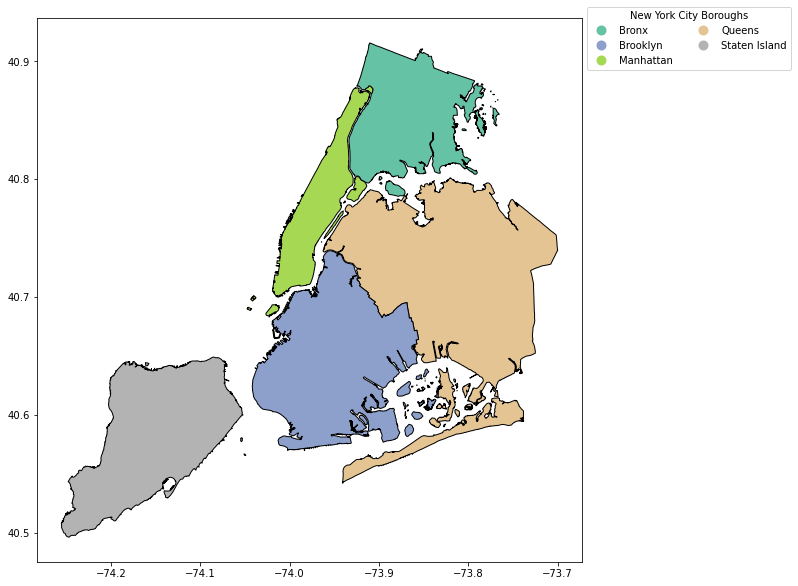

In [7]:
leg_kwds = {'title': 'New York City Boroughs', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

nyc.plot(column = 'boro_name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [8]:
subway_stations = pd.read_csv('../data/NYC_SUBWAY_STATIONS.csv')
subway_stations.head()

URL  OBJECTID              NAME  \
0  http://web.mta.info/nyct/service/         1          Astor Pl   
1  http://web.mta.info/nyct/service/         2          Canal St   
2  http://web.mta.info/nyct/service/         3           50th St   
3  http://web.mta.info/nyct/service/         4         Bergen St   
4  http://web.mta.info/nyct/service/         5  Pennsylvania Ave   

                                       the_geom         Partial_Lat  \
0  POINT (-73.99106999861966 40.73005400028978)  40.73005400028978)   
1  POINT (-74.00019299927328 40.71880300107709)  40.71880300107709)   
2  POINT (-73.98384899986625 40.76172799961419)  40.76172799961419)   
3  POINT (-73.97499915116808 40.68086213682956)  40.68086213682956)   
4  POINT (-73.89488591154061 40.66471445143568)  40.66471445143568)   

    Latitude               Partial_Long  Longitude           LINE  \
0  40.730054  POINT (-73.99106999861966 -73.991070  4-6-6 Express   
1  40.718803  POINT (-74.00019299927328 -74.000193  4-6-6 Express   
2  40.761728  POINT (-73.98384899986625 -73.983849          2-Jan   
3  40.680862  POINT (-73.97499915116808 -73.974999       2/3/2004   
4  40.664714  POINT (-73.89488591154061 -73.894886          4-Mar   

                                               NOTES  
0  4 nights, 6-all times, 6 Express-weekdays AM s...  
1  4 nights, 6-all times, 6 Express-weekdays AM s...  
2                              1-all times, 2-nights  
3           4-nights, 3-all other times, 2-all times  
4                        4-nights, 3-all other times

In [9]:
subway_stations = subway_stations[['NAME','the_geom', 'Latitude','Longitude','LINE','NOTES']]
subway_stations.head()

NAME                                      the_geom   Latitude  \
0          Astor Pl  POINT (-73.99106999861966 40.73005400028978)  40.730054   
1          Canal St  POINT (-74.00019299927328 40.71880300107709)  40.718803   
2           50th St  POINT (-73.98384899986625 40.76172799961419)  40.761728   
3         Bergen St  POINT (-73.97499915116808 40.68086213682956)  40.680862   
4  Pennsylvania Ave  POINT (-73.89488591154061 40.66471445143568)  40.664714   

   Longitude           LINE                                              NOTES  
0 -73.991070  4-6-6 Express  4 nights, 6-all times, 6 Express-weekdays AM s...  
1 -74.000193  4-6-6 Express  4 nights, 6-all times, 6 Express-weekdays AM s...  
2 -73.983849          2-Jan                              1-all times, 2-nights  
3 -73.974999       2/3/2004           4-nights, 3-all other times, 2-all times  
4 -73.894886          4-Mar                        4-nights, 3-all other times

In [10]:
subway_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       473 non-null    object 
 1   the_geom   473 non-null    object 
 2   Latitude   473 non-null    float64
 3   Longitude  473 non-null    float64
 4   LINE       473 non-null    object 
 5   NOTES      473 non-null    object 
dtypes: float64(2), object(4)
memory usage: 22.3+ KB


In [11]:
subway_stations["Longitude"] = subway_stations.Longitude.astype(float)

In [12]:
subway_stations['geometry'] = subway_stations.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
subway_stations.head(3)

NAME                                      the_geom   Latitude  \
0  Astor Pl  POINT (-73.99106999861966 40.73005400028978)  40.730054   
1  Canal St  POINT (-74.00019299927328 40.71880300107709)  40.718803   
2   50th St  POINT (-73.98384899986625 40.76172799961419)  40.761728   

   Longitude           LINE  \
0 -73.991070  4-6-6 Express   
1 -74.000193  4-6-6 Express   
2 -73.983849          2-Jan   

                                               NOTES  \
0  4 nights, 6-all times, 6 Express-weekdays AM s...   
1  4 nights, 6-all times, 6 Express-weekdays AM s...   
2                              1-all times, 2-nights   

                                       geometry  
0  POINT (-73.99106999861966 40.73005400028978)  
1  POINT (-74.00019299927328 40.71880300107709)  
2  POINT (-73.98384899986625 40.76172799961419)

In [13]:
subway_geo = gpd.GeoDataFrame(subway_stations, 
                           crs = nyc.crs, 
                           geometry = subway_stations['geometry'])

In [14]:
type(subway_geo)

geopandas.geodataframe.GeoDataFrame

In [15]:
nyc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
nyc_area_center = ['40.71','-74.00']
print(nyc_area_center)  

['40.71', '-74.00']


In [17]:
map_nyc = folium.Map(location = nyc_area_center, zoom_start = 12)
map_nyc

In [18]:
i = 0
for row_index, row_values in subway_stations.iterrows():
    if i <3: 
       print('index is', row_index)
       print('values are:')
       print(' ')
       print(row_values)
       print('------------------------- ')
       i+=1

index is 0
values are:
 
NAME                                                  Astor Pl
the_geom          POINT (-73.99106999861966 40.73005400028978)
Latitude                                             40.730054
Longitude                                            -73.99107
LINE                                             4-6-6 Express
NOTES        4 nights, 6-all times, 6 Express-weekdays AM s...
geometry          POINT (-73.99106999861966 40.73005400028978)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
NAME                                                  Canal St
the_geom          POINT (-74.00019299927328 40.71880300107709)
Latitude                                             40.718803
Longitude                                           -74.000193
LINE                                             4-6-6 Express
NOTES        4 nights, 6-all times, 6 Express-weekdays AM s...
geometry          POINT (-74.00019299927328 40.71880300107709)
Name: 1, dtype: ob

In [20]:
map_nyc = folium.Map(location =  nyc_area_center, zoom_start = 12)

for row_index, row_values in subway_stations.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['NAME'])
    icon=folium.Icon(color="purple",icon="subway", prefix='fa')
    marker = folium.Marker(
    location = loc, 
    popup = pop, icon = icon)
    marker.add_to(map_nyc)
    
map_nyc.save('../maps/nyc_subway.html')

map_nyc

In [22]:
cluster_map_nyc = folium.Map(location =  nyc_area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_nyc)

for row_index, row_values in subway_stations.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['NAME'])
    icon=folium.Icon(color="purple",icon="subway", prefix='fa')
    marker = folium.Marker(
    location = loc, 
    popup = pop, icon = icon)
    marker.add_to(marker_cluster)
    
cluster_map_nyc.save('../maps/nyc_subway_cluster.html')

cluster_map_nyc